# Initial example of Linear Regression

## Getting started

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pylab as py

## Generating data

In [ ]:
# Generate data
number_of_points = 10
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise


Remember, our general model is

$$
y = f(x) + \epsilon
$$

In the case of linear models we have

$$
f(x) = a x + b
$$

So, our full data generating process is

$$
f(x) = a x + b + \epsilon
$$


In [ ]:
print(x)
print(y)

[0.57944248 0.50360449 0.87003467 0.11040655 0.91744256 0.99576014
 0.44792562 0.64491963 0.69720532 0.31532938]
[1.05960194 1.09345884 1.42036437 0.60215881 1.36025755 1.46746439
 0.95858667 1.15746362 1.15112094 0.84330373]


## Our first plot

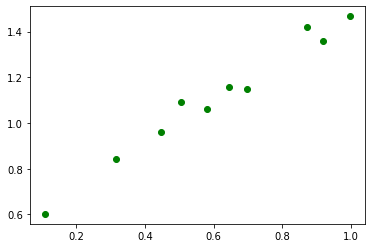

In [ ]:
py.scatter(x, y, color='green')

## Which I have already messed up :-)

I don't want a dear friend getting mad at me...  So I need to label my axes!

![Rick Brown](https://www.wpi.edu/sites/default/files/faculty-image/drb_0.jpg?1641483676061)

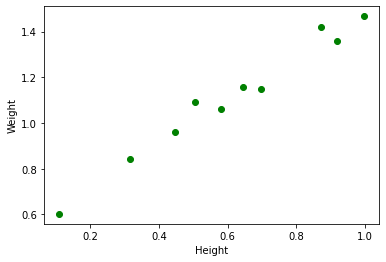

In [ ]:
py.scatter(x, y, color='green')
py.xlabel('Height')
py.ylabel('Weight');

Oh, sorry, wrong class 😀

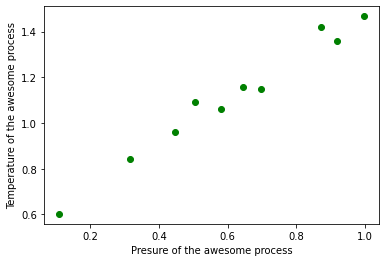

In [ ]:
py.scatter(x, y, color='green')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## Making a hypothesis  




Here we do some some **math**!  

There is a lot of magic 🧙 that happens here.  We will go into some of it as we go forward, but not too much 😀

In [ ]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(x, y, deg=deg)
y_hat_function = np.poly1d(z)


## I can now save lab time

In [ ]:
# What I am really interested in.  I have never done this example and I
# want to same time by not doing the experiment!
x_interested = 0.9
y_hat_interested = y_hat_function(x_interested)
print(f'For a pressure of {x_interested} I predict a temperature of {y_hat_interested}')


For a pressure of 0.9 I predict a temperature of 1.389000161225932


## A nice plot... but am I done?

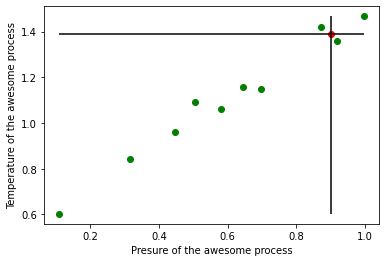

In [ ]:
py.scatter(x, y, color='green')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.scatter(x_interested, y_hat_interested, color='red')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## No!
I don't know if I ***trust*** the answer.  Perhaps I actually need to do the experiment!?

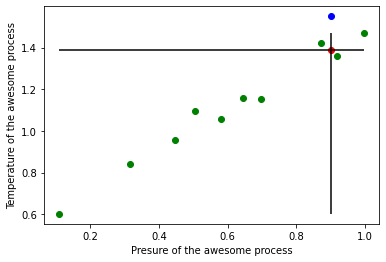

In [ ]:
y_from_new_experiment = 1.55

py.scatter(x, y, color='green')
py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## Training versus testing

![My happy face](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/SNice.svg/1024px-SNice.svg.png)

## Not all errors are created equal

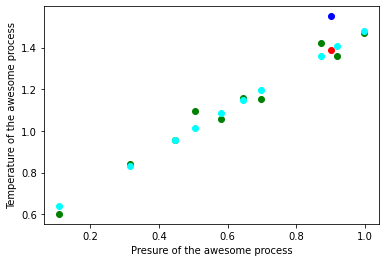

In [ ]:
y_from_new_experiment = 1.55
y_training_predictions = y_hat_function(x)

py.scatter(x, y, color='green')
py.scatter(x, y_training_predictions, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## This is why we call this linear regression

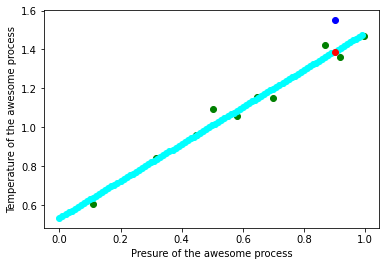

In [ ]:
y_from_new_experiment = 1.55

#y_training_predictions = y_hat_function(x)
x_on_grid = np.arange(0,1,0.01)
y_predictions_on_grid = y_hat_function(x_on_grid)

py.scatter(x, y, color='green')
py.scatter(x_on_grid, y_predictions_on_grid, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## Better Python code

I am tired of typing so much, so let's make a function

In [ ]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1):
  x = np.random.uniform(0, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x + true_b + noise
  return x,y

def create_model(x, y):
  deg = 1

  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=deg)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

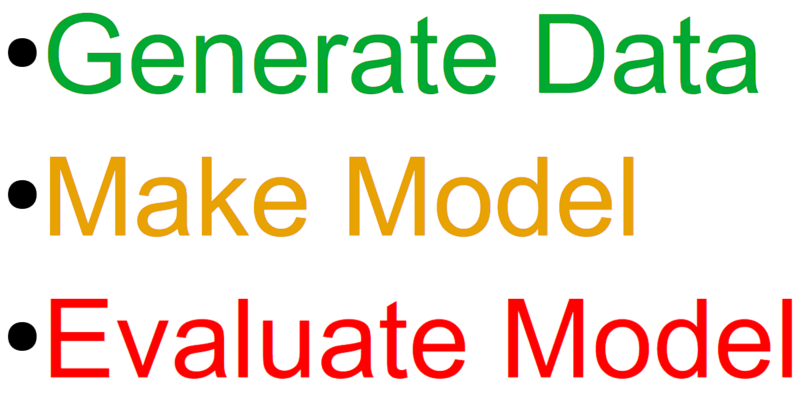

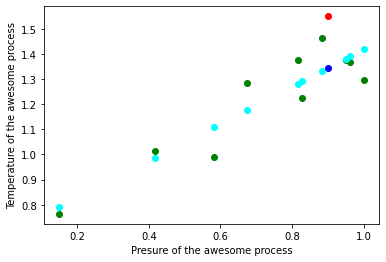

In [ ]:
x_train, y_train = generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1)
model = create_model(x_train, y_train)
evaluate_model(model, x_train, y_train, x_test=[0.9], y_test=[1.55])

## Things are going to get interesting....

![joke](http://virtuallawpractice.org/wp-content/uploads/2015/10/And-now.jpg)



## Some *minor* but really **important** modifications to the code 🧙

In [ ]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1, degree=1):
  x = np.random.uniform(-1, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x**degree + true_b + noise

  return x,y

def create_model(x, y, degree=1):
  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=degree)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  x_on_grid = np.arange(min([min(x_train), min(x_test)]), max([max(x_train), max(x_test)]), 0.01)
  y_predictions_on_grid = model(x_on_grid)

  py.plot(x_on_grid, y_predictions_on_grid)

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

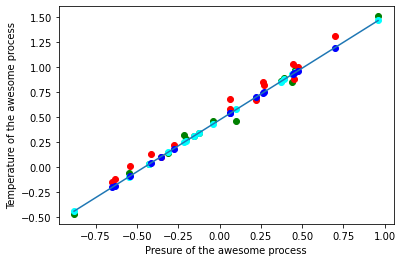

In [ ]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=1)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

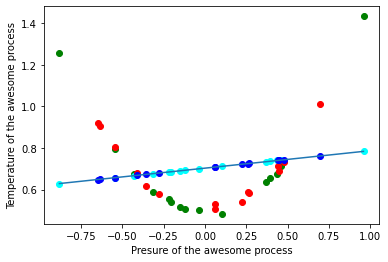

In [ ]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.01, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

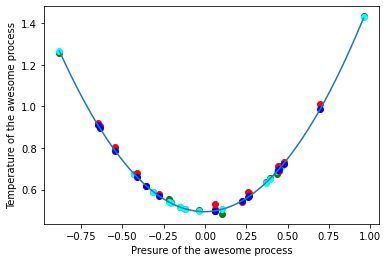

In [ ]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.01, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=2)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

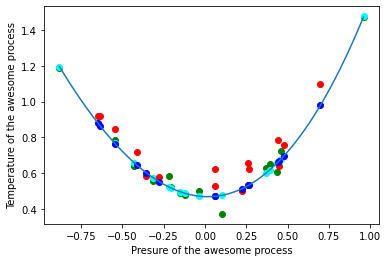

In [ ]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=3)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

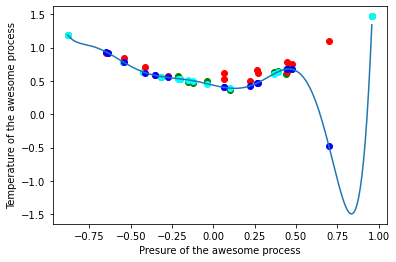

In [ ]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=8)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)